<style>
body, div, span, p, h1, h2, h3, h4, h5, h6, li, a {
    font-family: "Helvetica", sans-serif;
}
</style>

## Inlämningsuppgift Statistiska metoder ITHS - AI22

**Mål:** Svara på en eller flera statistiska frågeställningar med hjälp av kursmetoder.

**Syfte:** Arbeta med statistiska metoder och paket i Python, utforska dataset och arbeta med öppna frågeställningar.

**Deadline:** Måndag 6/2 kl 23.59. Rekommenderat format är PDF.

Ta fram en rapport som beskriver ett av tre valbara dataset med hjälp av de statistiska metoder vi går igenom i kursen. Rapporten skall vara konstruerad som ett skriftligt dokument (Word, Notebook eller Presentation) som inkluderar beskrivande text, kod-segment och plottar. Beräkningar, plottar och liknande skall göras i Python.

Rapportens maxlängd bör vara begränsad till 5-10 sidor, beroende på format.
Rapporten kan utformas på valfritt sätt, men skall baseras på element från kursen, t.ex.:

- Deskriptiva mått som medelvärde, median och standardavvikelse
- Konfidensintervall
- Hypotestest
- Korrelationsanalys
- Linjär regression

OBS! - Rapporten behöver inte beskriva hela data-setet i detalj. Välj ut ett fåtal variabler/features att fokusera på. Det är viktigare med en bra frågeställning och en tydlig analys kring frågeställningen, än att inkludera ”så mycket som möjligt”.

Basera rapporten på statistiska mått och metoder vi gått igenom i kursen. Att inkludera massor av andra beräkningspaket/inferensmetoder/etc ger inte högre möjlighet till VG.

Dataset: Välj ett av nedanstående dataset att använda för analysen. Allihop finns tillgängliga på ITHS-distans. Iris och MT-Cars är något mindre data-set med tydliga trender, medan Diamonds är mycket mer omfattande och otydligt. OBS: Val av dataset påverkar inte bedömningen av resultatet. För de flesta studenter rekommenderas Iris eller MT-Cars, för den som vill ha mer utmaning kan Diamonds användas.

- Iris – Ett dataset som beksriver längd och bredd på blombladen hos irisblommor. Insamlat av biologen Ronald Fisher 1936.
- MT Cars – Data hämtad från det amerikanska magainset Motor Trend. Beskriver olika motorparametrar hos 32 bilmodeller år 1973-74.
- Diamonds – Data om diamanter som beskriver olika fysiska parametrar så som storlek, klarhet och prissättning.

**Betygskriterier:** Inlämningsuppgiften kommer betygsättas enl. godkänd (G), väl godkänd (VG) eller icke godkänd med retur. För att bli godkänd på kursen krävs godkänd rapport. Om rapportbetyget är VG erhålls 10 bonuspoäng till tentan. (Tentan kommer vara på totalt 50p, där gränsen för G är 25p och gränsen för VG är 37p)

För godkänd rapport krävs att rapporten innehåller beskrivande text och figurer samt fungerande, kommenterad Python-kod; att rapporten beskriver en eller flera relationer i datasetet med statistiska mått och figurer; och att minst ett konfidensintervall och/eller hypotestest utförs.
För väl godkänd rapport krävs utöver kravet för godkänd, att koden är väl kommenterad och lättläst; att figurerna är välgjorda med tydliga axlar, legender och färgsättningar; att rapporten innehåller en linjär regressionsmodell, och att modellen används till prediktion; samt att rapporten tydligt förklarar valet av mått och test som används för att besvara frågeställningen.
Om rapporten inte når upp till nivån för godkänd lämnas retur. En ny rapport skall då vara inlämnad inom en vecka efter tentadatum, varefter betyget VG inte längre går att erhålla.
OBS! Bonuspoängen räknas inte till nivån Godkänd på tentan, utan bidrar enbart till att nå betygsnivån Väl Godkänd.

In [129]:
import pandas as pd

def läs(filnamn):
    return pd.read_csv('Data/' + filnamn)

cars, diam, iris = läs('cars.csv'), läs('diamonds.csv'), läs('iris.csv')

def explore(df):
    print(f''
    f'{df.memory_usage().sum()=} bytes \n'
    f'Set rows: {df.shape[0]}   \n'
    f'Set columns: {df.shape[1]}\n\n'
    f'{df.value_counts()}\n\n'
    f'{df.describe()}')
    return df.head(3)

explore(cars)

df.memory_usage().sum()=28784 bytes 
Set rows: 398   
Set columns: 9

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year  origin  name                    
9.0   8          304.0         193.0       4732    18.5          70          usa     hi 1200d                    1
27.0  4          151.0         90.0        2950    17.3          82          usa     chevrolet camaro            1
                 140.0         86.0        2790    15.6          82          usa     ford mustang gl             1
                 112.0         88.0        2640    18.6          82          usa     chevrolet cavalier wagon    1
                 101.0         83.0        2202    15.3          76          europe  renault 12tl                1
                                                                                                                ..
18.5  6          250.0         110.0       3645    16.2          76          usa     pontiac ventura sj          1
               

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


I think cars are pretty cool, as far as engineering goes. However the cultural impact of cars is terrifying.

This set has acceleration, which is an interesting factor. I will consider selecting this set.

But miles per gallon? Not very scientific measurement.

In [130]:
explore(diam)

df.memory_usage().sum()=4315328 bytes 
Set rows: 53940   
Set columns: 10

carat  cut      color  clarity  depth  table  price  x      y      z   
0.79   Ideal    G      SI1      62.3   57.0   2898   5.90   5.85   3.66    5
0.50   Premium  D      SI2      62.9   58.0   997    5.06   5.01   3.17    2
1.20   Premium  I      VS2      62.6   58.0   5699   6.77   6.72   4.22    2
0.52   Ideal    D      VS2      61.8   55.0   1822   5.16   5.19   3.20    2
0.41   Ideal    G      IF       61.7   56.0   1367   4.77   4.80   2.95    2
                                                                          ..
0.50   Ideal    E      VS1      61.9   56.0   1716   5.09   5.12   3.16    1
                                62.0   58.0   1755   5.09   5.14   3.17    1
                                62.2   54.0   1665   5.10   5.13   3.18    1
                                       56.0   1619   5.10   5.13   3.18    1
5.01   Fair     J      I1       65.5   59.0   18018  10.74  10.54  6.98    1
Length

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


Some say diamonds are forever. And they are pretty neat in industrial applications. But once again, the cultural aspect is ridiculous. However, this set contains dimensional data, which is neat because of 3D rendering possibilities. 

I will consider using this set as well.

In [131]:
explore(iris)

df.memory_usage().sum()=6128 bytes 
Set rows: 150   
Set columns: 5

sepal_length   sepal_width   petal_length   petal_width   class         
4.9           3.1           1.5            0.1           Iris-setosa        3
5.8           2.7           5.1            1.9           Iris-virginica     2
              4.0           1.2            0.2           Iris-setosa        1
5.9           3.0           4.2            1.5           Iris-versicolor    1
6.2           3.4           5.4            2.3           Iris-virginica     1
                                                                           ..
5.5           2.3           4.0            1.3           Iris-versicolor    1
              2.4           3.7            1.0           Iris-versicolor    1
                            3.8            1.1           Iris-versicolor    1
              2.5           4.0            1.3           Iris-versicolor    1
7.9           3.8           6.4            2.0           Iris-virginica     1


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


Iris is the smallest and easiest - but also the most boring - set.

I like flowers, but this dataset just ain't interesting enough. I won't select this set.

---

Ok sure, lets do iris giving I have little to no time.

<strong> <h1> Part 1 - Cleaning and initial analysis </strong> </h1>

In [132]:
# remove whitespaces from column names
iris.rename(columns=lambda x: x.strip(), inplace=True)

# rename class to species
iris.rename(columns={'class': 'species'}, inplace=True)

# check new columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [133]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [134]:
# some initial analysis of mean, median and standard deviation
species_groups = iris.groupby('species')

for species, species_df in species_groups:
    mean = species_df.mean(numeric_only=True)
    print(f"Species: {species}")
    print(f"Mean: {mean}")
    print("\n")

Species: Iris-setosa
Mean: sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64


Species: Iris-versicolor
Mean: sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64


Species: Iris-virginica
Mean: sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64




In [135]:
# same thing basically but concating all collected values (mean, median and std of all length and width attributes) to new df
results_list = []

# loop over each species group and calculate mean, median, and standard deviation for each attribute
for species, species_df in species_groups:
    for attribute in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
        mean = species_df[attribute].mean()
        median = species_df[attribute].median()
        std = species_df[attribute].std()
        
        # add the results for this attribute to the results_list
        results_list.append({'species': species, 'attribute': attribute, 'mean': mean, 'median': median, 'std': std})

# combine the results from the list into a single df
results = pd.concat([pd.DataFrame(item, index=[0]) for item in results_list], ignore_index=True)

# pivot_table() for better readability 
results = results.pivot_table(index=['species', 'attribute'], values=['mean', 'median', 'std'])

results

mean  median       std
species         attribute                            
Iris-setosa     petal_length  1.464    1.50  0.173511
                petal_width   0.244    0.20  0.107210
                sepal_length  5.006    5.00  0.352490
                sepal_width   3.418    3.40  0.381024
Iris-versicolor petal_length  4.260    4.35  0.469911
                petal_width   1.326    1.30  0.197753
                sepal_length  5.936    5.90  0.516171
                sepal_width   2.770    2.80  0.313798
Iris-virginica  petal_length  5.552    5.55  0.551895
                petal_width   2.026    2.00  0.274650
                sepal_length  6.588    6.50  0.635880
                sepal_width   2.974    3.00  0.322497

In [136]:
# Sort by high to low standard deviation
std_sorted_results = results.sort_values(by='std', ascending=False)

std_sorted_results

mean  median       std
species         attribute                            
Iris-virginica  sepal_length  6.588    6.50  0.635880
                petal_length  5.552    5.55  0.551895
Iris-versicolor sepal_length  5.936    5.90  0.516171
                petal_length  4.260    4.35  0.469911
Iris-setosa     sepal_width   3.418    3.40  0.381024
                sepal_length  5.006    5.00  0.352490
Iris-virginica  sepal_width   2.974    3.00  0.322497
Iris-versicolor sepal_width   2.770    2.80  0.313798
Iris-virginica  petal_width   2.026    2.00  0.274650
Iris-versicolor petal_width   1.326    1.30  0.197753
Iris-setosa     petal_length  1.464    1.50  0.173511
                petal_width   0.244    0.20  0.107210

Iris-virginica has largest sepal length but this data also has highest standard devation.
Iris-setosa is the smallest flower. Iris-versicolor is midsized.

The standard deviation is very low for setosa. Speaking of std, let's add variance as it will make it much easier for us.

We get variance by squaring the standard deviation.


In [137]:
results['variance'] = results['std'].apply(lambda x: x**2)

results

mean  median       std  variance
species         attribute                                      
Iris-setosa     petal_length  1.464    1.50  0.173511  0.030106
                petal_width   0.244    0.20  0.107210  0.011494
                sepal_length  5.006    5.00  0.352490  0.124249
                sepal_width   3.418    3.40  0.381024  0.145180
Iris-versicolor petal_length  4.260    4.35  0.469911  0.220816
                petal_width   1.326    1.30  0.197753  0.039106
                sepal_length  5.936    5.90  0.516171  0.266433
                sepal_width   2.770    2.80  0.313798  0.098469
Iris-virginica  petal_length  5.552    5.55  0.551895  0.304588
                petal_width   2.026    2.00  0.274650  0.075433
                sepal_length  6.588    6.50  0.635880  0.404343
                sepal_width   2.974    3.00  0.322497  0.104004

<strong> <h1> Part 1.1 - The variance trial </strong> </h1>

This part is, well, very spontaneous. But I want to find out if the standard deviation appears smaller because the measurments themselves are smaller.

Let's look at it this way:



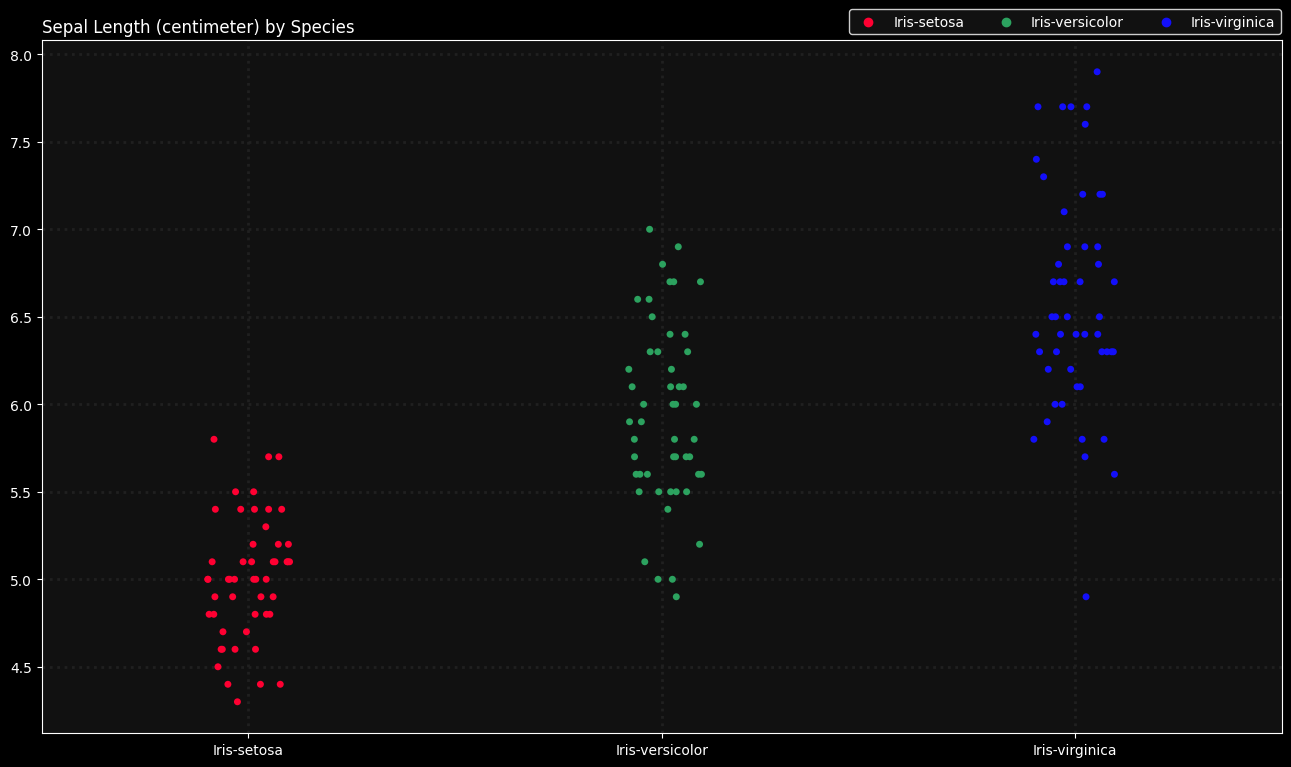

In [146]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Styling and size
rcParams['figure.figsize'] = 16,9
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#111111'

# Color palette to be used for each species
colp = {'red':   "#FF0032",
        'green': "#2CA25F",
        'blue':  '#130FFA',}

facecolor_ax = '#0D1117'

# strip plot of the sepal length for each species
sns.stripplot(iris, x='species', y='sepal_length', hue='species', palette=colp.values())
plt.grid(color='#202020', linestyle=':', linewidth=2)

plt.title('Sepal Length (centimeter) by Species', loc='left')

plt.legend(loc='upper center', bbox_to_anchor=(0.825, 1.055),
          ncol=3, fancybox=True, shadow=True)

plt.xlabel('')
plt.ylabel('')


plt.show()

Whoa, look at that lil guy over at virginica. Who dat boi?

---

<strong> <h1> Part 1.1 - The difference of an outlier </strong> </h1>

Previoulsy when we ran the tests for sepal lengths, we found that
virginica had a mean sepal length of 6.588, a median of 6.5 and an std of 0.635880

Looking at the visualisation above, we find that lil deviant, I want to find how how big of a difference we get if we remove it.

In [ ]:
# manually finding the minimum sepal length for the "Iris-virginica" species
iris[iris["species"] == "Iris-virginica"]["sepal_length"].min()

4.9

In [ ]:
# filter the dataset to only include the "Iris-virginica" species
virginica = iris[iris["species"] == "Iris-virginica"]

# find row
row = virginica[virginica["sepal_length"] == 4.9]

print("The entry matching sepal length 4.9 and species 'Iris-versicolor' is at:")
row

The entry matching sepal length 4.9 and species 'Iris-versicolor' is at:


,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,Iris-virginica


There goes that boi.

In [ ]:
# just to illustrate the impact of the lil boi at index 106 and its impact on mean, median and std

# save lil boi as series to restore later
lil_boi = iris.loc[106]

# remove lil boi from set 
iris.drop(106, inplace=True)

# previously we got
#                                   mean    median  std
# Iris-virginica	sepal_length	6.588	6.50	0.635880

# if we re-run the tests with the lil boi removed:

In [ ]:
virginica = iris[iris["species"] == "Iris-virginica"]

# new calculations with the 
mean_sepal_length = virginica["sepal_length"].mean()
median_sepal_length = virginica["sepal_length"].median()
std_sepal_length = virginica["sepal_length"].std()

print("The new mean sepal length for Iris-virginica is:", mean_sepal_length)
print("The new median sepal length for Iris-virginica is:", median_sepal_length)
print("The new standard deviation of sepal length for Iris-virginica is:", std_sepal_length)
print("\n")
print("By removing item at index 106, the deviant lil flower boi, we increased the mean by:")
print(f"{(mean_sepal_length - 6.588) / 6.588 * 100} %")
print("We also decreased the standard deviation by:")
print(f"{abs(std_sepal_length- 0.635880) / 0.635880 * 100} %")


The new mean sepal length for Iris-virginica is: 6.622448979591836
The new median sepal length for Iris-virginica is: 6.5
The new standard deviation of sepal length for Iris-virginica is: 0.593459246748267


By removing item at index 106, the deviant lil flower boi, we increased the mean by:
0.5229049725536786 %
We also decreased the standard deviation by:
6.671188471367712 %


As expected, the mean increased and the std decreased. A bit less unexpected the median is the same, but it really isn't *that* surprising if we consider how median is calculated.

0.5 % might not be that much, but 6.7% is. Interesting results. However, we have no real reason to remove the outlier at index 106, so let's put the lil boi back again and continue our assignment.

In [ ]:
iris.loc[106] = lil_boi
iris = iris.sort_index().reset_index(drop=True)

---
<h1> <strong> Part 1.2 - More plotting and some regression </strong> </h1>
As we've seen in the previous plot, visualising data can be a good way to quickly find patterns, trends or outliners which can explain the data.

Let's have a closer look at some plots.

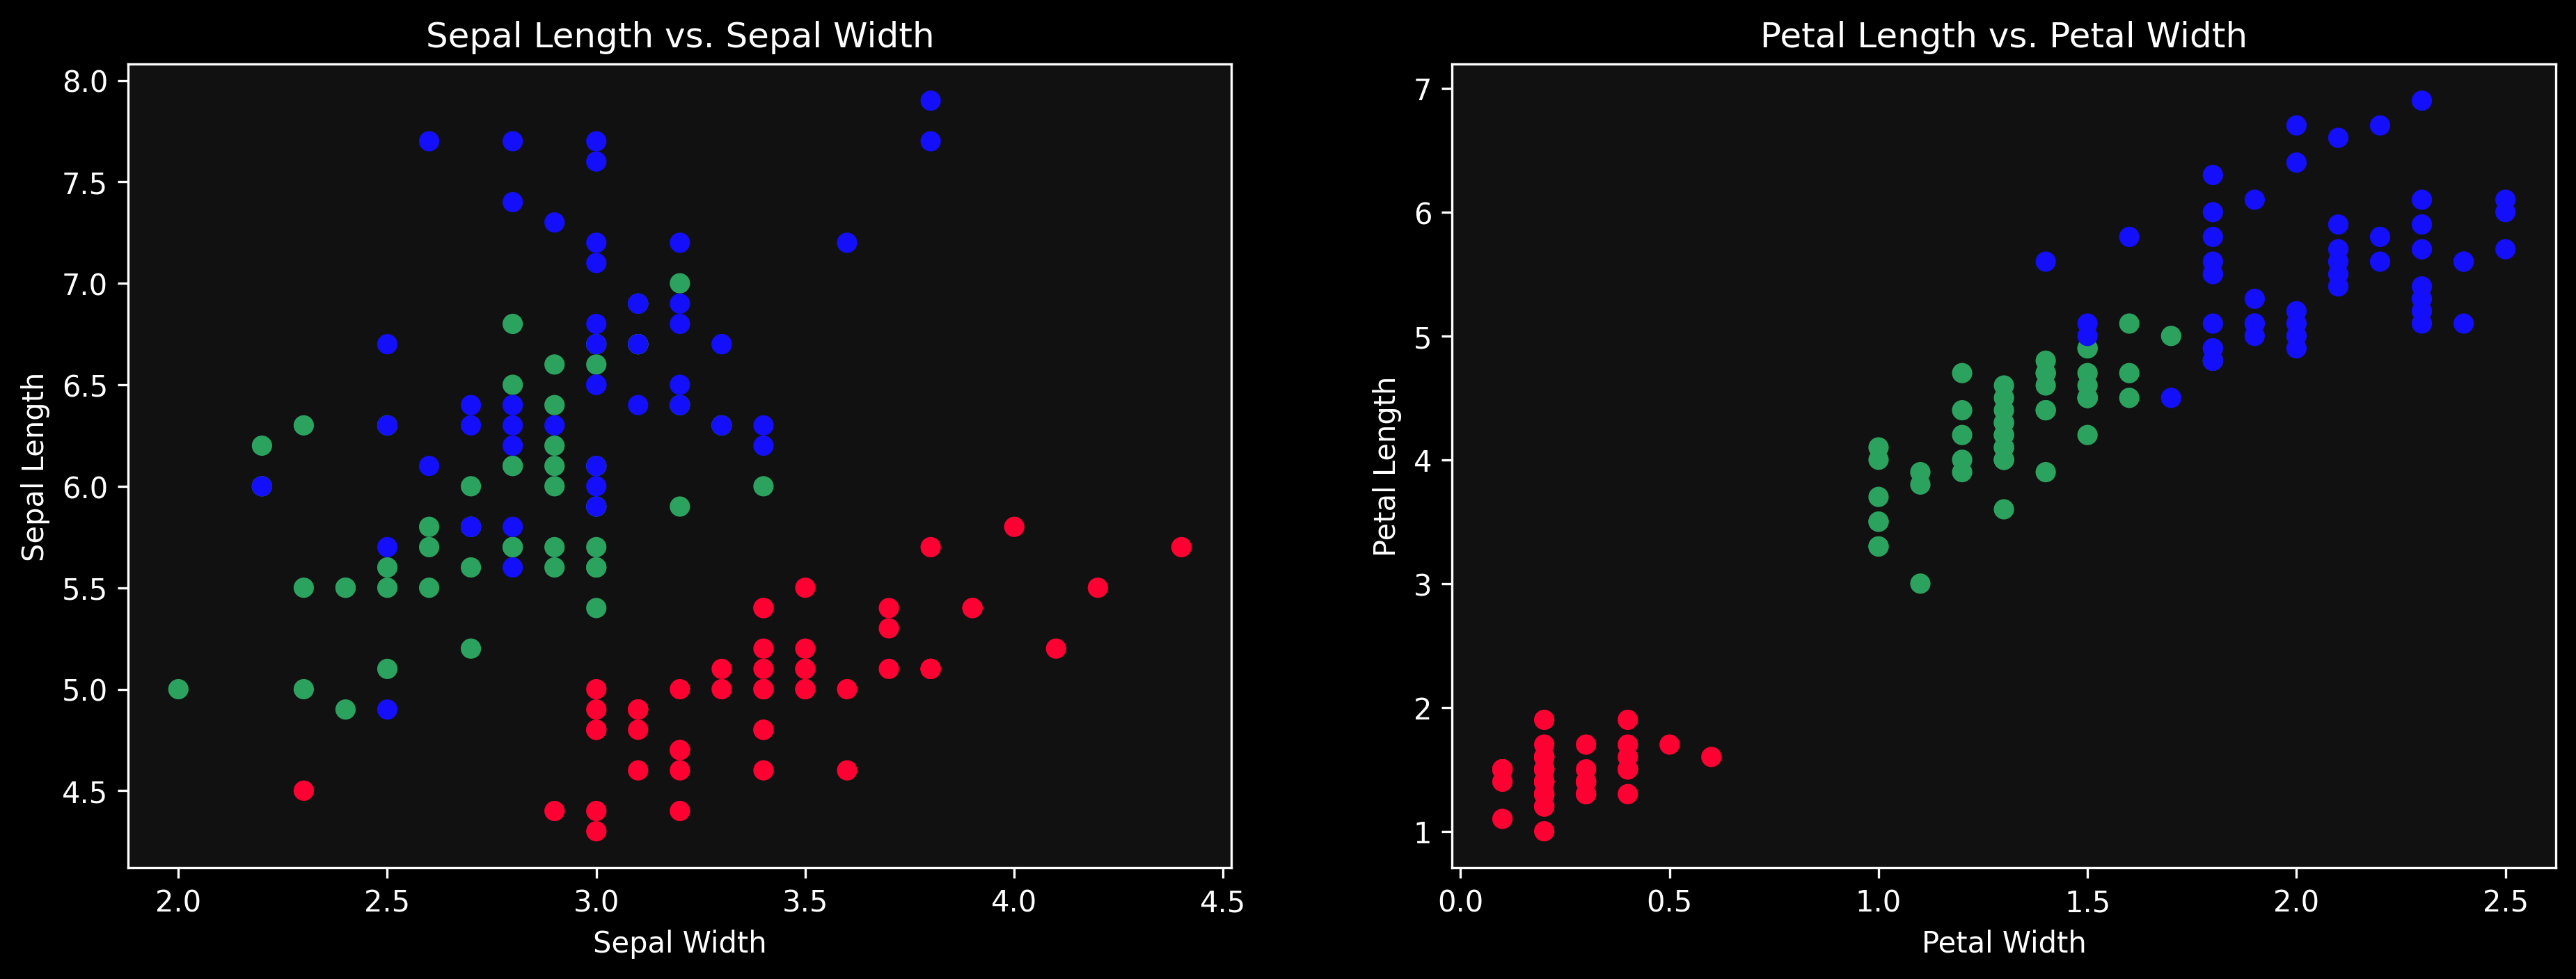

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=300)

sepal = ax1.scatter(x=iris['sepal_width'], y=iris['sepal_length'], c=iris['species'].map({'Iris-setosa':colp['red'], 'Iris-versicolor':colp['green'], 'Iris-virginica':colp['blue']}))
ax1.set_xlabel('Sepal Width')
ax1.set_ylabel('Sepal Length')
ax1.set_title('Sepal Length vs. Sepal Width')

petal = ax2.scatter(x=iris['petal_width'], y=iris['petal_length'], c=iris['species'].map({'Iris-setosa':colp['red'], 'Iris-versicolor':colp['green'], 'Iris-virginica':colp['blue']}))
ax2.set_xlabel('Petal Width')
ax2.set_ylabel('Petal Length')
ax2.set_title('Petal Length vs. Petal Width')

plt.show()

#### Starting with **sepal length & width**, we can see *some* trends but it's very clear for **petal length & width**. <br>

The petal dimensions within all three species look, well, almost linear, while the sepal is more scattered and overlapping within Versicolor (green) and Virginica (blue).

--- 

Here we'll use the lmplot function from seaborn, which combines regplot() and FacetGrid, to have a closer look at the petal sizes.

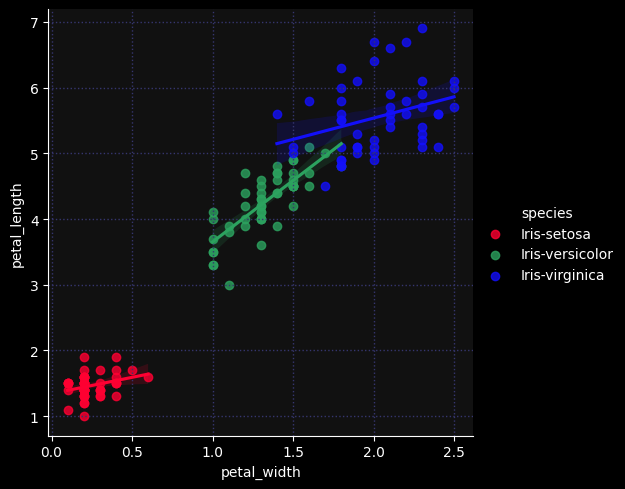

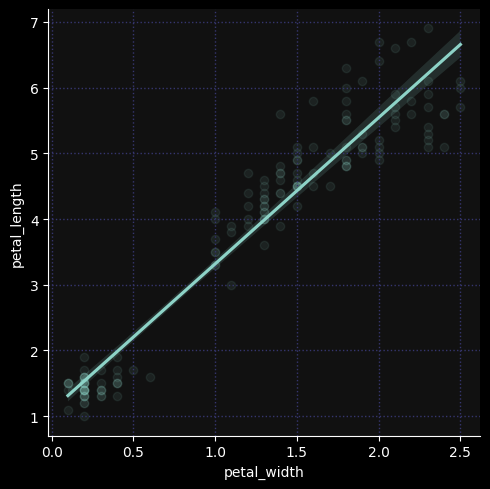

In [ ]:
petal_lmplot = sns.lmplot(iris, y='petal_length', x='petal_width', hue='species', palette=colp.values())

plt.grid(color='#36366f', linestyle=':', linewidth=1)
plt.show()

sns.lmplot(iris, y="petal_length", x="petal_width", scatter_kws = dict(alpha = 0.09))

plt.grid(color='#36366f', linestyle=':', linewidth=1)
plt.show()

Now this looks promising, petal size seems to be key for labeling unknown species. 

---
<h1> <strong> Part 2 - Confidence Interval </strong> </h1>

---
<h1> <strong> Part 2 - Confidence Interval </strong> </h1>

In [ ]:
from scipy import stats
import numpy as np

species_groups = iris.groupby('species')

CI_results_list = []

# loop over each species group and calculate mean, median, and standard deviation for each attribute
for species, species_df in species_groups:
    sepal_length = species_df['sepal_length']
    
    # calculate the mean, standard deviation, and sample size for this species
    mean = np.mean(sepal_length)
    std = np.std(sepal_length)
    n = len(sepal_length)
    
    # calculate the standard error of the mean
    sem = std / np.sqrt(n)
    
    # t-statistic and critical value for a 95% confidence interval
    # to get a 95% margin of error, we want 5% of the probability to be in each tail of the distribution
    t_statistic = stats.t.ppf(0.975, n - 1)
    margin_of_error = t_statistic * sem
    
    # lower and upper bounds of the confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    CI_results_list.append({'species': species, 'mean': mean, 'std': std, 'n': n, 'lower_bound': lower_bound, 'upper_bound': upper_bound})

CI_results = pd.DataFrame(CI_results_list)

CI_results

,species,mean,std,n,lower_bound,upper_bound
0,Iris-setosa,5.006,0.348947,50,4.906830,5.105170
1,Iris-versicolor,5.936,0.510983,50,5.790780,6.081220
2,Iris-virginica,6.588,0.629489,50,6.409101,6.766899


idk rn gn